In [78]:
import os
from scipy.io import loadmat
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# the following import is required for matplotlib < 3.2:
from mpl_toolkits.mplot3d import Axes3D  # noqa
import mne
import funcs4eeg as fe
import re
import imp
imp.reload(fe)

<module 'funcs4eeg' from 'c:\\Users\\Tianyi Zheng\\OneDrive - neuron.t.u-tokyo.ac.jp\\Documents\\zheng\\mywork\\attention_tES\\tes-attention\\processing\\eeg_analysis\\funcs4eeg.py'>

### Load data

Opening raw data file ..\..\..\data\13\repaired_before.fif...
    Range : 0 ... 646472 =      0.000 ...   538.727 secs
Ready.
Reading 0 ... 646472  =      0.000 ...   538.727 secs...


c:\Users\Tianyi Zheng\OneDrive - neuron.t.u-tokyo.ac.jp\Documents\zheng\mywork\attention_tES\tes-attention\processing\eeg_analysis\funcs4eeg.py:17: RuntimeWarning: This filename (..\..\..\data\13\repaired_before.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_before = mne.io.read_raw_fif(eeg_path_before, preload=True, verbose=True)


Opening raw data file ..\..\..\data\13\repaired_after.fif...
    Range : 0 ... 646471 =      0.000 ...   538.726 secs
Ready.
Reading 0 ... 646471  =      0.000 ...   538.726 secs...
120 events found


c:\Users\Tianyi Zheng\OneDrive - neuron.t.u-tokyo.ac.jp\Documents\zheng\mywork\attention_tES\tes-attention\processing\eeg_analysis\funcs4eeg.py:18: RuntimeWarning: This filename (..\..\..\data\13\repaired_after.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg_after = mne.io.read_raw_fif(eeg_path_after, preload=True, verbose=True)


Event IDs: [1]
120 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
96 events found
Event IDs: [1]
24 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
120 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
40 events found
Event IDs: [1]
48 events found
Event IDs: [1]
32 events found
Event IDs: [1]
32 events found
Event IDs: [1]
24 events found
Event IDs: [1]
8 events found
Event IDs: [1]
24 events found
Event IDs: [1]
32 events found
Event IDs: [1]
120 events found
Event IDs: [1]


c:\Users\Tianyi Zheng\OneDrive - neuron.t.u-tokyo.ac.jp\Documents\zheng\mywork\attention_tES\tes-attention\processing\eeg_analysis\funcs4eeg.py:97: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  


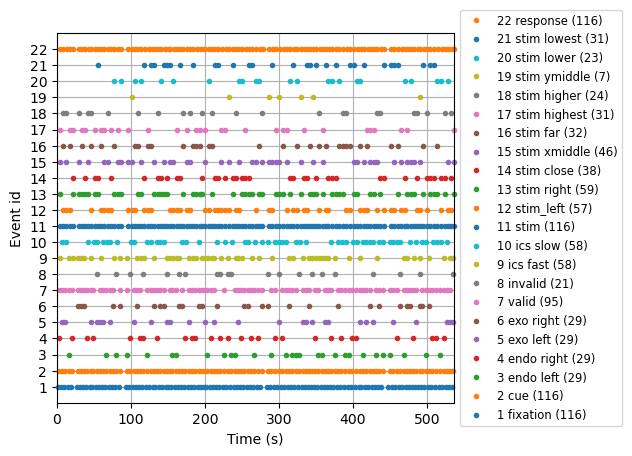

Not setting metadata
116 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 116 events and 2401 original time points ...
0 bad epochs dropped
Not setting metadata
116 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\viz\epochs.py:543: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax['evoked'].get_shared_x_axes().join(ax['evoked'], ax_im)


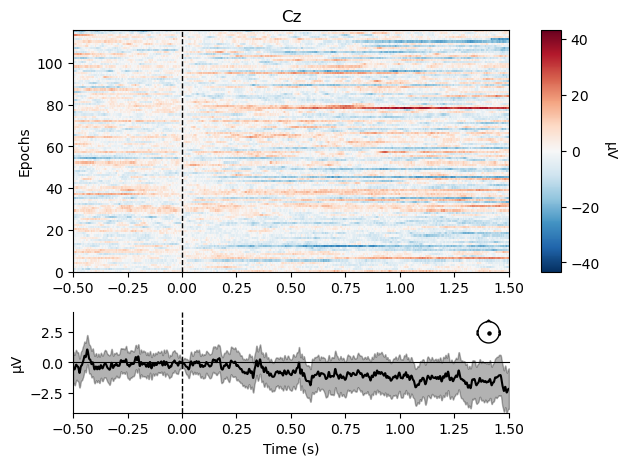

[<Figure size 640x480 with 4 Axes>]

In [79]:
subject_id = 13
eeg_before, eeg_after = fe.load_eeg(subject_id)
trials_before, trials_after = fe.inuse_trials(subject_id)
events, event_dict = fe.make_default_events(eeg_after)
picked_events, picked_events_dict = fe.make_custom_events(eeg_after, events, event_dict, trials_after,'1')
epochs = fe.make_epochs(eeg_before, picked_events, picked_events_dict, '11 stim',tmin=-0.5, tmax=1.5)
epochs.plot_image(picks=['Cz'])

In [80]:
trials_before, trials_after = fe.inuse_trials(subject_id)
len(trials_before), len(trials_after)

(113, 116)

### Make default events

120 events found
Event IDs: [1]
120 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
30 events found
Event IDs: [1]
96 events found
Event IDs: [1]
24 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
120 events found
Event IDs: [1]
60 events found
Event IDs: [1]
60 events found
Event IDs: [1]
40 events found
Event IDs: [1]
48 events found
Event IDs: [1]
32 events found
Event IDs: [1]
32 events found
Event IDs: [1]
24 events found
Event IDs: [1]
8 events found
Event IDs: [1]
24 events found
Event IDs: [1]
32 events found
Event IDs: [1]
113 events found
Event IDs: [1]


C:\Users\Tianyi Zheng\AppData\Local\Temp\ipykernel_23980\945369280.py:19: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=eeg.info['sfreq'],


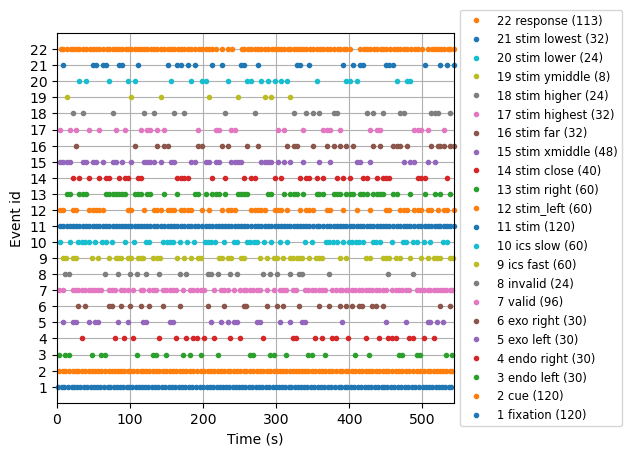

In [81]:
# Extract channel names and types
ch_names = eeg.info['ch_names']
ch_types = ['misc'] + ['eeg'] * 32 + ['misc'] + ['stim'] * 22

# Detect events
stim_channel_names = [ch_name for ch_name, ch_type in zip(ch_names, ch_types) if ch_type == 'stim']
events = np.array([], dtype=int).reshape(0, 3)  # Create an empty events array with 3 columns

for idx, stim_channel_name in enumerate(stim_channel_names):
    single_event = mne.find_events(eeg, stim_channel=stim_channel_name, min_duration=1/eeg.info['sfreq'])

    # Update the event id in single_event (the third column) to be idx + 1
    single_event[:, 2] = idx + 1

    # Concatenate single_event to the events array
    events = np.vstack([events, single_event])

event_dict = {str(idx+1)+" "+stim_channel_name: idx + 1 for idx, stim_channel_name in enumerate(stim_channel_names)}
fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=eeg.info['sfreq'],
                          first_samp=eeg.first_samp)


### Customize events

C:\Users\Tianyi Zheng\AppData\Local\Temp\ipykernel_23980\1483214199.py:31: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  fig = mne.viz.plot_events(picked_events_1, event_id=picked_events_dict_1, sfreq=eeg.info['sfreq'], first_samp=eeg.first_samp)


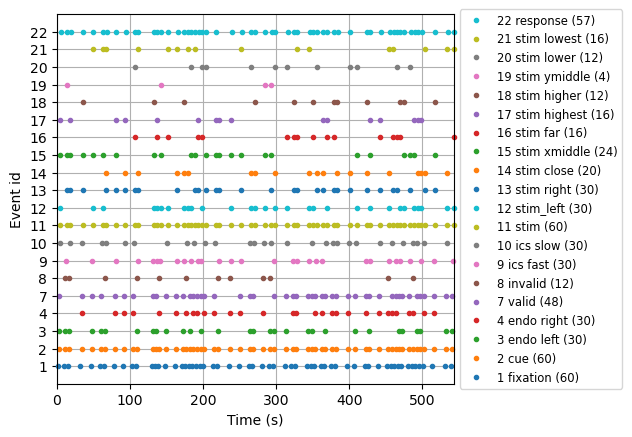

C:\Users\Tianyi Zheng\AppData\Local\Temp\ipykernel_23980\1483214199.py:32: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  fig = mne.viz.plot_events(picked_events_2, event_id=picked_events_dict_2, sfreq=eeg.info['sfreq'], first_samp=eeg.first_samp)


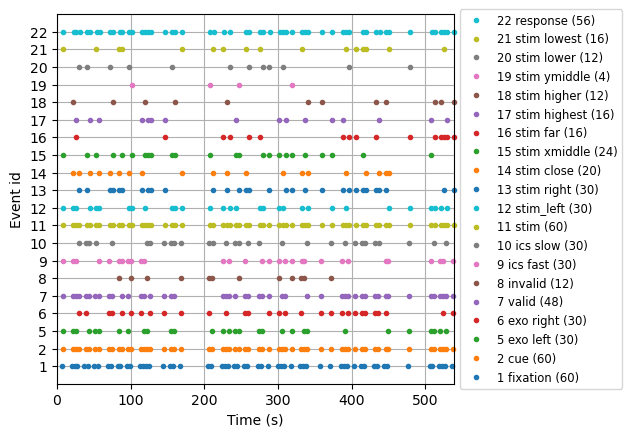

In [82]:
# Get the indices that would sort the first column
sort_indices = np.argsort(events[:, 0])

# Use these indices to sort the entire array
sorted_events = events[sort_indices]

# Make pieces
pieces = []
piece = []
for event in sorted_events:
    if event[2] == 1 and piece:  # Found a 1 in the third column and there are events in current piece
        pieces.append(np.array(piece))  # Save the current piece as a numpy array
        piece = []  # Create a new piece
    piece.append(event)  # Add the current event to the piece

# Add the last piece if it's not empty
if piece:
    pieces.append(np.array(piece))

# e.g. (3 OR 4) AND 7
# the_pieces = [piece for piece in pieces if (any(piece[:, 2] == 3) | any(piece[:, 2] == 4)) & any(piece[:, 2] == 7)]

the_pieces_1 = eval(fa.condition("3 | 4"))
picked_events_1 = np.vstack(the_pieces_1)
picked_events_dict_1 = {key: value for key, value in event_dict.items() if value in picked_events_1[:, 2]}

the_pieces_2 = eval(fa.condition("5 | 6"))
picked_events_2 = np.vstack(the_pieces_2)
picked_events_dict_2 = {key: value for key, value in event_dict.items() if value in picked_events_2[:, 2]}

fig = mne.viz.plot_events(picked_events_1, event_id=picked_events_dict_1, sfreq=eeg.info['sfreq'], first_samp=eeg.first_samp)
fig = mne.viz.plot_events(picked_events_2, event_id=picked_events_dict_2, sfreq=eeg.info['sfreq'], first_samp=eeg.first_samp)


### make epochs

Not setting metadata
60 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 60 events and 2401 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


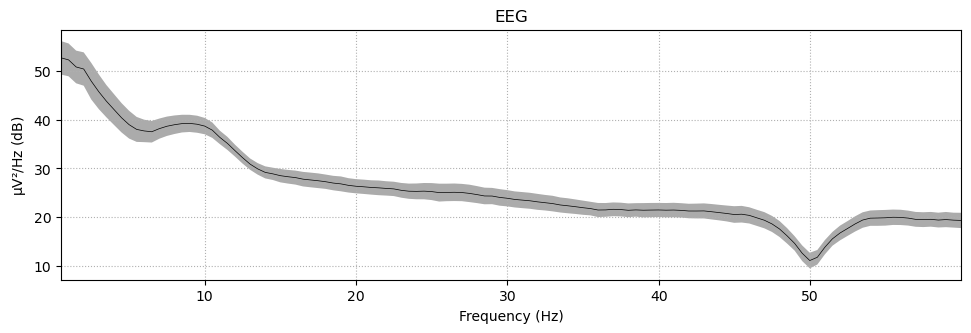

Not setting metadata
60 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 60 events and 2401 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


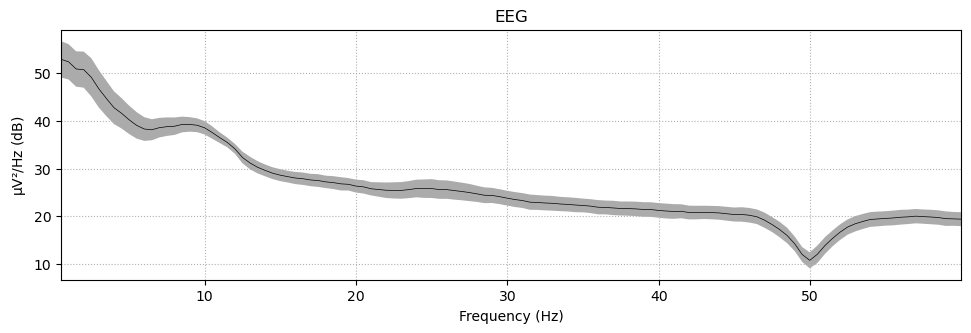

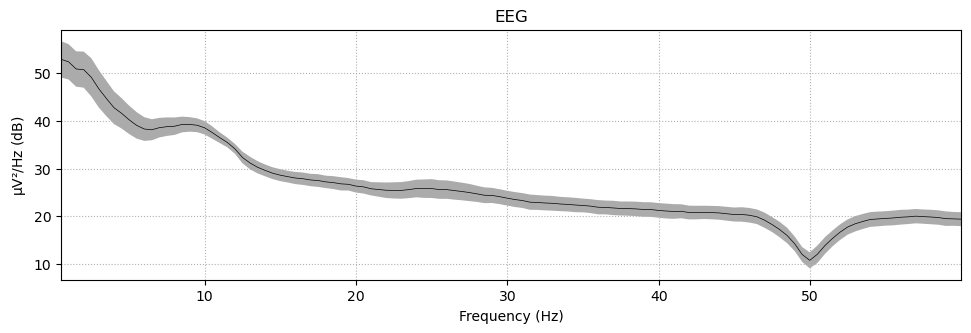

In [83]:
# Create epochs with the interested events

epochs_1 = mne.Epochs(eeg, picked_events_1, event_id=picked_events_dict_1['11 stim'], tmin = -0.5, tmax=1.5, baseline=(0,0), preload=True)
epochs_1.plot_psd(fmin=0.1, fmax=60, average=True)

epochs_2 = mne.Epochs(eeg, picked_events_2, event_id=picked_events_dict_1['11 stim'], tmin = -0.5, tmax=1.5, baseline=(0,0), preload=True)
epochs_2.plot_psd(fmin=0.1, fmax=60, average=True)

# Plot the epochs
# epochs.plot_image(picks=['Cz', 'P6'])

No baseline correction applied


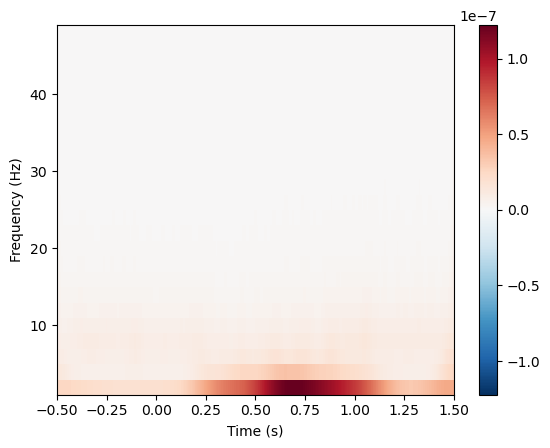

[<Figure size 640x480 with 2 Axes>]

In [84]:
frequencies = np.arange(2, 50, 2)
power = mne.time_frequency.tfr_morlet(
    epochs_1, n_cycles=2, return_itc=False, freqs=frequencies, decim=3
)
power.plot(["Cz"])

combining channels using "gfp"
combining channels using "gfp"


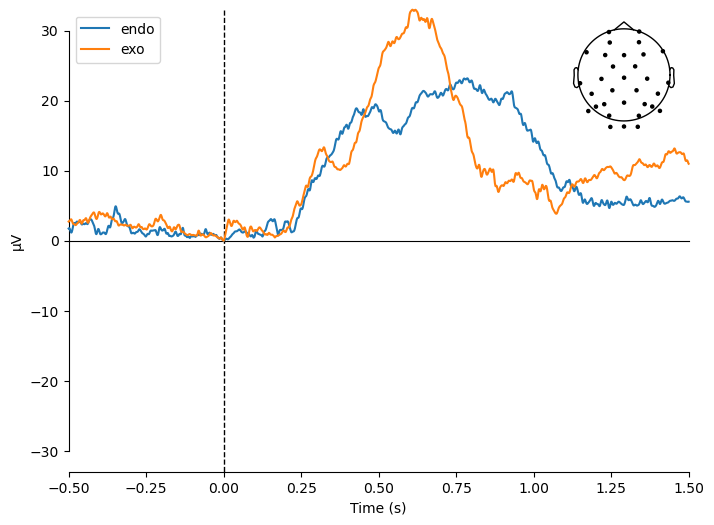

[<Figure size 800x600 with 2 Axes>]

In [85]:
evoked_1 = epochs_1.average()
evoked_2 = epochs_2.average()

mne.viz.plot_compare_evokeds(
    dict(endo=evoked_1, exo=evoked_2),
    legend="upper left",
    show_sensors="upper right",
)